In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command
import numpy as np
import os
import torch
from srcnn_files.srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile
import pickle

In [4]:
with open('pickle_files/pickle_real_image_list.pkl', 'rb') as inp:
    real_image_list = pickle.load(inp)

In [5]:
# img1 = np.array(Image.open("superres/real_images/screenshot1.png").convert("L"))
# img2 = np.array(Image.open("superres/real_images/screenshot2.png").convert("L"))
# img3 = np.array(Image.open("superres/real_images/screenshot3.png").convert("L"))

In [6]:
# img1 = (img1/np.max(img1)*255).astype(int)

In [7]:
# trench1 = img1[20:130,245:-5]

In [8]:
img60 = (real_image_list[1]/np.max(real_image_list[1])*255).astype(int)
img40 = (real_image_list[2]/np.max(real_image_list[2])*255).astype(int)
img30 = (real_image_list[3]/np.max(real_image_list[3])*255).astype(int)
img20 = (real_image_list[4]/np.max(real_image_list[4])*255).astype(int)

In [9]:
img60_upsampled = linear_interpolate(img60,(207,54),method="linear")
img40_upsampled = linear_interpolate(img40,(207,54),method="linear")
img30_upsampled = linear_interpolate(img30,(207,54),method="linear")
img20_upsampled = linear_interpolate(img20,(207,54),method="linear")

In [10]:
SR_MODEL_60 = SRCNN()
SR_MODEL_60.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/SR_training/train/pmc_0.1092_linear_output/model_ckpt.pth")['model_state_dict'])
SR_MODEL_60.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [11]:
SR_MODEL_40 = SRCNN()
SR_MODEL_40.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/SR_training/train/pmc_0.1638_linear_output/model_ckpt.pth")['model_state_dict'])
SR_MODEL_40.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [12]:
SR_MODEL_30 = SRCNN()
SR_MODEL_30.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/SR_training/train/pmc_0.2184_linear_output/model_ckpt.pth")['model_state_dict'])
SR_MODEL_30.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [13]:
SR_MODEL_20 = SRCNN()
SR_MODEL_20.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/SR_training/train/pmc_0.3276_linear_output/model_ckpt.pth")['model_state_dict'])
SR_MODEL_20.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [14]:
input = img60_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img60_sr = (np.array(SR_MODEL_60(input)).reshape((207,54))*255).astype(int)

In [15]:
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.1092/convolutions/synth_00023_pmc_0.1092.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_60(input)).reshape((207,54))*255).astype(int)

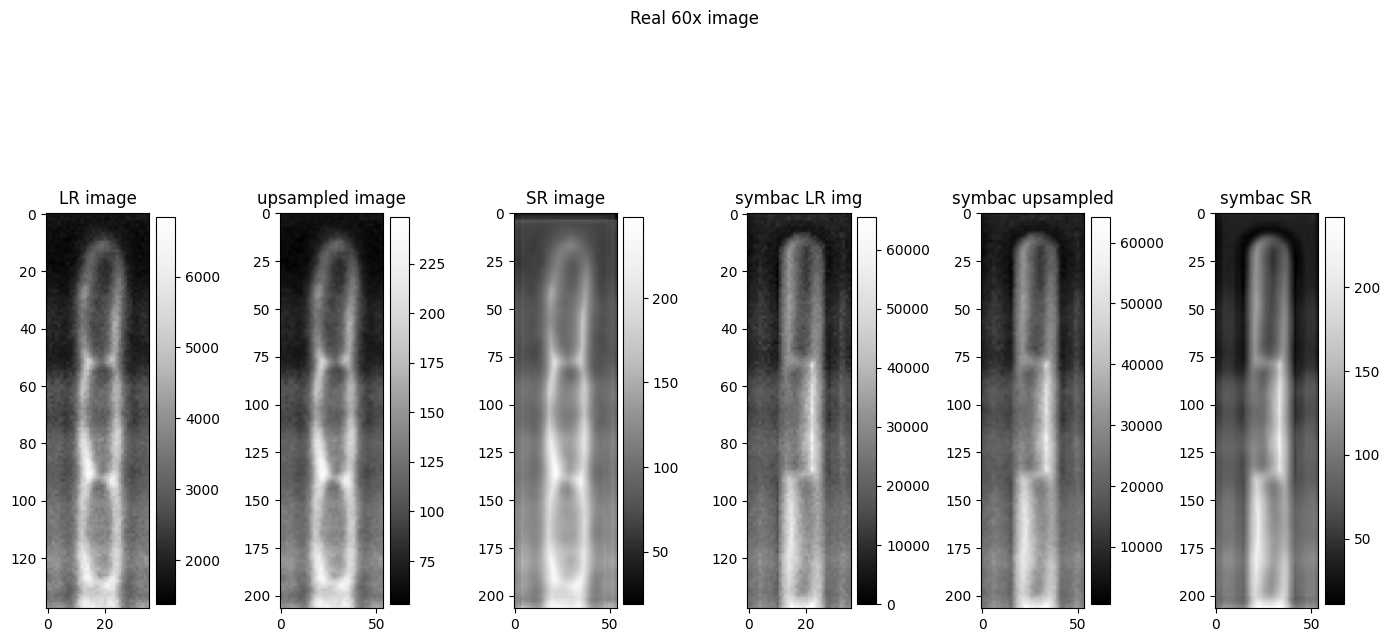

In [16]:
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 60x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img60_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img60_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

# NEED TO TRY SR WITH THE 90X OMNIPOSE MODEL TOO

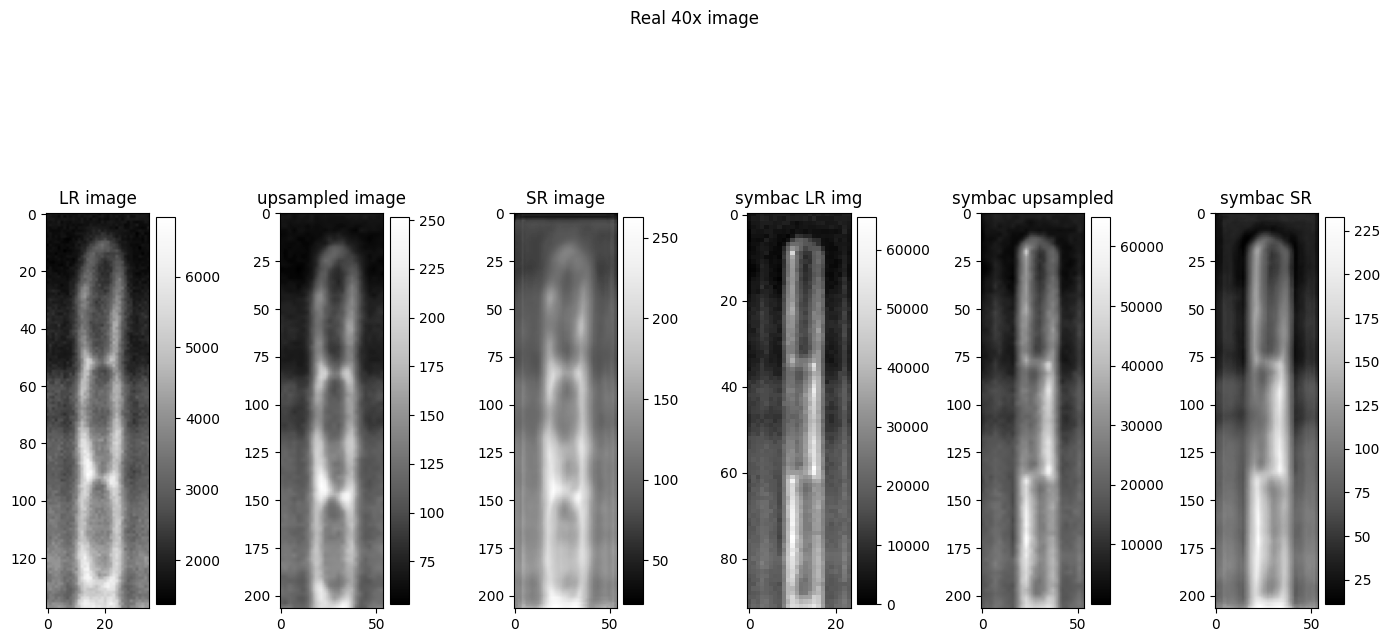

In [17]:
input = img40_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img40_sr = (np.array(SR_MODEL_40(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.1638/convolutions/synth_00023_pmc_0.1638.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_40(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 40x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img40_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img40_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

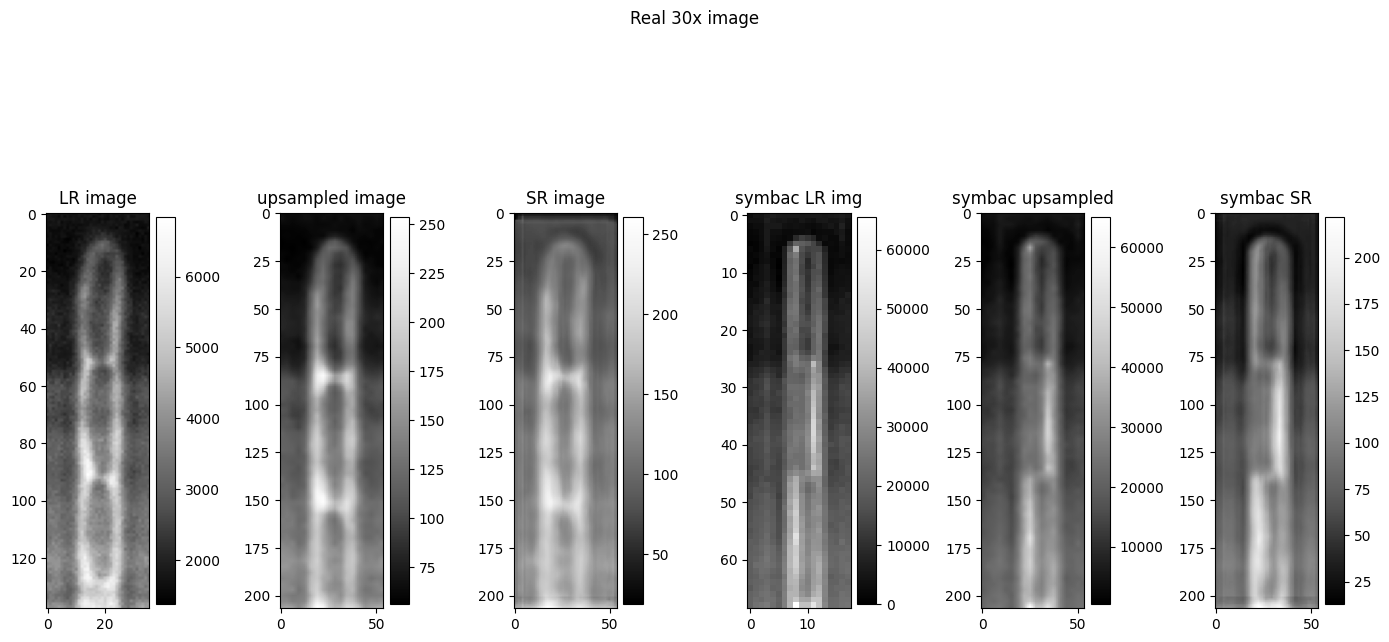

In [18]:
input = img30_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img30_sr = (np.array(SR_MODEL_30(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.2184/convolutions/synth_00023_pmc_0.2184.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_30(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 30x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img30_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img30_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

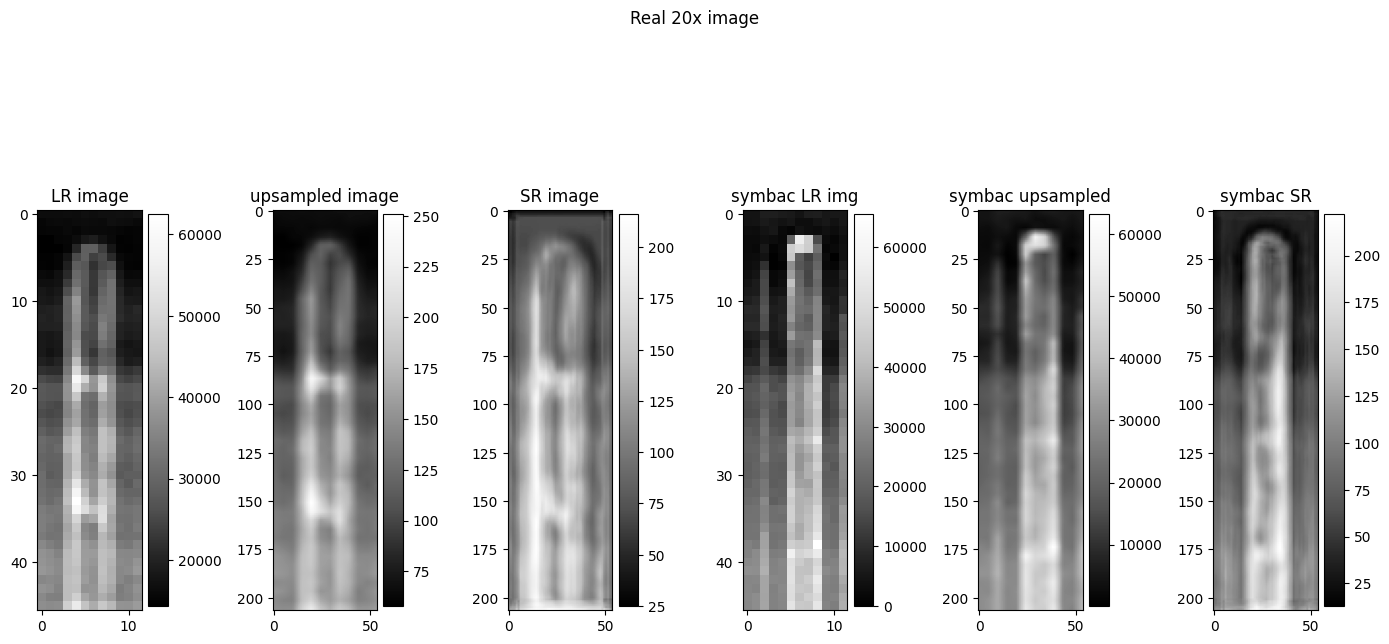

In [19]:
input = img20_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img20_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.3276/convolutions/synth_00010_pmc_0.3276.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 20x image")
ax0 = axs[0].imshow(real_image_list[4],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img20_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img20_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

In [20]:
import cv2 as cv

In [36]:
hr   = cv.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/real_data/90x/real_image.png",cv.IMREAD_GRAYSCALE)
lr   = cv.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/real_data/20x/lr_img/real_image.png",cv.IMREAD_GRAYSCALE)
ulr  = cv.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/real_data/20x/ulr_img/upsampled_real_image.png",cv.IMREAD_GRAYSCALE)
rcan = cv.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/real_data/20x/sr/upsampled_real_image.png",cv.IMREAD_GRAYSCALE)

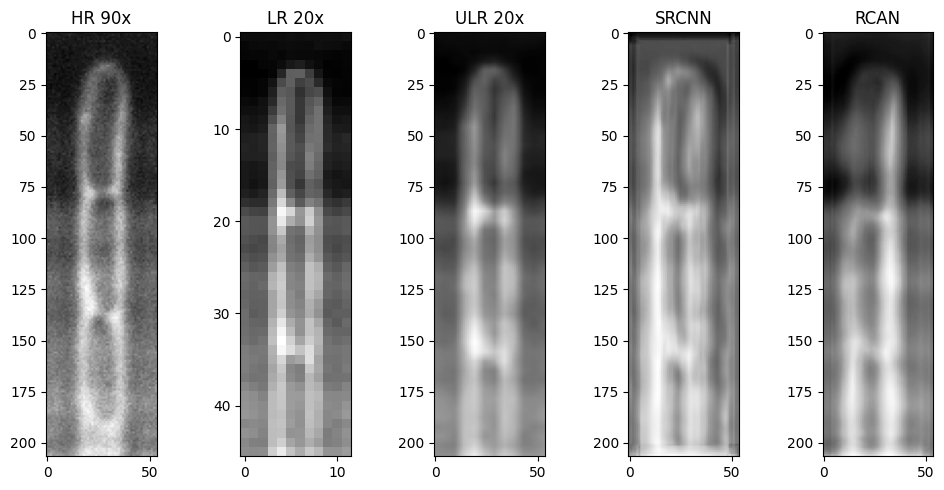

In [41]:


input = ulr.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img20_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
# eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.3276/convolutions/synth_00010_pmc_0.3276.tif")
# eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
# input = eg1_upsampled.reshape(1,207,54)
# input = (input//256)/255
# input = torch.tensor(input, dtype=torch.float)
# with torch.no_grad():
#     eg1_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,5,figsize=(10,5))
axs[0].imshow(hr,cmap="Greys_r")
axs[0].set_title("HR 90x")
axs[1].imshow(real_image_list[4],cmap="Greys_r")
axs[1].set_title("LR 20x")
axs[3].imshow(img20_sr,cmap="Greys_r")
axs[3].set_title("SRCNN")
axs[2].imshow(ulr,cmap="Greys_r")
axs[2].set_title("ULR 20x")
axs[4].imshow(rcan,cmap="Greys_r")
axs[4].set_title("RCAN")
fig.tight_layout()
plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/real_images.pdf")
plt.show()

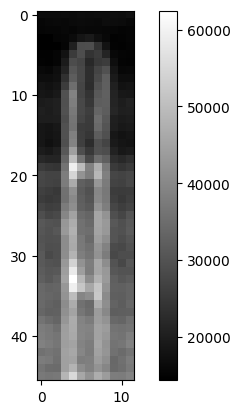

In [25]:
plt.imshow((real_image_list[4]),"gray")
plt.colorbar()
plt.show()

In [28]:
real_image_list[4]

array([[16492, 16492, 16539, 16682, 16534, 16801, 16776, 16972, 16871,
        17132, 16837, 17402],
       [15512, 15978, 16193, 16014, 16301, 16567, 16263, 16062, 16836,
        16652, 16504, 15858],
       [15455, 15569, 15487, 15991, 15532, 16077, 15994, 15913, 15755,
        15643, 15288, 15393],
       [14482, 14412, 15457, 15663, 16579, 18414, 19357, 17246, 15971,
        14914, 14932, 15330],
       [14480, 14417, 14352, 15404, 20578, 28863, 29183, 23821, 18020,
        14928, 14850, 15229],
       [14807, 14803, 15324, 17815, 25593, 29169, 24121, 25480, 21218,
        15970, 15312, 15266],
       [15102, 14910, 15351, 19522, 28705, 27457, 22209, 25031, 25944,
        17074, 15238, 15083],
       [16129, 15829, 17134, 21106, 30555, 27967, 23164, 27159, 29742,
        18336, 15808, 16032],
       [16937, 16898, 17366, 23441, 31957, 28037, 23137, 28182, 32051,
        19410, 16851, 16847],
       [18242, 17725, 18353, 25907, 35166, 27405, 22901, 29855, 32396,
        20394, 17762

In [29]:
lr

array([[[ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 71,  71,  71]],

       [[ 63,  63,  63],
        [ 65,  65,  65],
        [ 66,  66,  66],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 64,  64,  64]],

       [[ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 63,  63,  63],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       ...,

       [[154, 154, 154],
        [151, 151, 151],
        [143, 143, 143],
        ...,
        [138, 138, 138],
        [145, 145, 145],
        [154, 154, 154]],

       [[147, 147, 147],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [140, 140, 140],
        [143, 143, 143],
        [151, 151, 151]],

       [[151, 151, 151],
        [149, 149, 149],
        [150, 150, 150],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [159, 159, 159]]

In [31]:
some = np.array(lr,dtype=np.uint16)*256
some

array([[[17152, 17152, 17152],
        [17152, 17152, 17152],
        [17152, 17152, 17152],
        ...,
        [17664, 17664, 17664],
        [17408, 17408, 17408],
        [18176, 18176, 18176]],

       [[16128, 16128, 16128],
        [16640, 16640, 16640],
        [16896, 16896, 16896],
        ...,
        [17152, 17152, 17152],
        [17152, 17152, 17152],
        [16384, 16384, 16384]],

       [[16128, 16128, 16128],
        [16128, 16128, 16128],
        [16128, 16128, 16128],
        ...,
        [16128, 16128, 16128],
        [15872, 15872, 15872],
        [15872, 15872, 15872]],

       ...,

       [[39424, 39424, 39424],
        [38656, 38656, 38656],
        [36608, 36608, 36608],
        ...,
        [35328, 35328, 35328],
        [37120, 37120, 37120],
        [39424, 39424, 39424]],

       [[37632, 37632, 37632],
        [36352, 36352, 36352],
        [35840, 35840, 35840],
        ...,
        [35840, 35840, 35840],
        [36608, 36608, 36608],
        [38656,

2023-05-28 19:36:33,341 [WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


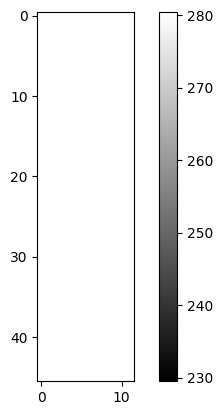

In [30]:
plt.imshow(,"gray")
plt.colorbar()
plt.show()